In [379]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import SVR
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/Users/divyasandiman/Downloads/zomato.csv', encoding='ISO-8859-1')

In [6]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

#### There are 9 null values in cuisines, rest of the columns has no null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

#### 1) There are 13 categorical and 8 numberical columns.
#### 2) Total of 20 columns an51 rows

In [9]:
df[df.duplicated()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes


## There are no duplicate rows

In [12]:
df[df.isin(['']).any(axis=1)]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes


#### There are no cells with blank spaces

In [15]:
for i in df.columns:
    print(df[i].value_counts())
    print('+++++++++++++++++++++++++++++++++++++++++')

6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant ID, Length: 9551, dtype: int64
+++++++++++++++++++++++++++++++++++++++++
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64
+++++++++++++++++++++++++++++++++++++++++
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64
+++++++++++++++++++++++++++++++++++++++++
New Delhi           5473
Gurgaon             1118
Noida             

#### 1. There are 3 columns 'Has_Table_booking','Has_Online_delivery', 'Is_delivering_now' with 2 unique values.
#### 2. The Rating_text and Rating_color columns has 6 unique values each and gives the same kind of information
#### 3. The Aggregate_rating column is having values from 0 to 5, 4.9 being the highest
#### 4. The Price_range column has 4 unique values, however there is an imbalance.
#### 5. The Switch to order menu has only one unique value and hence doesnt give any valuable input hence can be dropped.
#### 6. The Currency column has 12 difference currencies. This also states that the Average_cost_for_two column has values in 12    different currencies and should be standardized.
#### 7. The Longitude and Latitude columns has 498 cells with 0 values which means that the coordinate are unavailable for these. These rows can be dropped.
#### 8. There are restaurants from 141 Cities.

In [45]:
# Striping the column name and then replacing spaces with underscore
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [46]:
df.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text',
       'Votes'],
      dtype='object')

In [58]:
# Extracting numerical columns
numcols=[col for col in df.columns if df[col].dtypes!='O']

In [59]:
numcols

['Restaurant_ID',
 'Country_Code',
 'Longitude',
 'Latitude',
 'Average_Cost_for_two',
 'Price_range',
 'Aggregate_rating',
 'Votes']

In [60]:
# Extracting categorical columns
catcols=[col for col in df.columns if df[col].dtypes=="O"]

In [61]:
catcols

['Restaurant_Name',
 'City',
 'Address',
 'Locality',
 'Locality_Verbose',
 'Cuisines',
 'Currency',
 'Has_Table_booking',
 'Has_Online_delivery',
 'Is_delivering_now',
 'Switch_to_order_menu',
 'Rating_color',
 'Rating_text']

<Axes: xlabel='Average_Cost_for_two'>

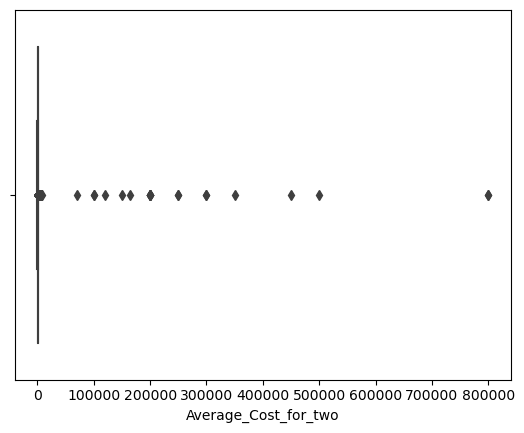

In [62]:
# The box plot suggest extreme outliers, due to the fact that the cost values are in different currencies 
sns.boxplot(x=df['Average_Cost_for_two'])

In [63]:
df.describe()

,Restaurant_ID,Country_Code,Longitude,Latitude,Average_Cost_for_two,Price_range,Aggregate_rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [408]:
df=df[df['Average_Cost_for_two']!=0]

In [404]:
Q1 = df['Average_Cost_for_two'].quantile(0.25)
Q3 = df['Average_Cost_for_two'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_cleaned = df[(df['Average_Cost_for_two'] >= lower_bound) & (df['Average_Cost_for_two'] <= upper_bound)]

In [405]:
df.shape

(9527, 171)

<Axes: xlabel='Average_Cost_for_two'>

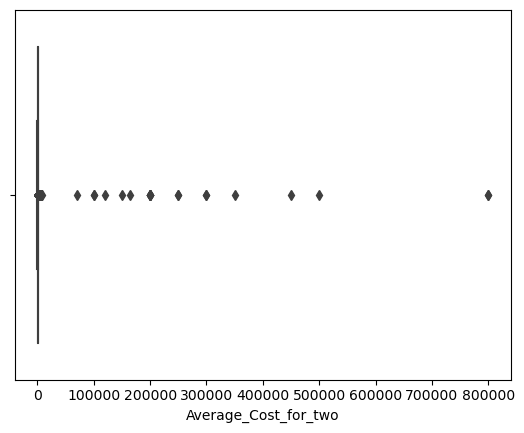

In [406]:
sns.boxplot(x=df['Average_Cost_for_two'])

In [409]:
df.dropna(inplace=True) # dropping all nan values

In [410]:
df.shape

(9527, 171)

In [412]:
df.isnull().sum().sum() # Now there are no null values

0

In [75]:
df.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text',
       'Votes'],
      dtype='object')

In [79]:
df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(\x8c£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [294]:
# I noticed that the pounds sign in Currency column was showing an odd value '\x8c' hence replacing it
df['Currency'] = df['Currency'].str.replace(r'\x8c', '', regex=True)

In [415]:
# downloaded these conversion rates to USD from a website and 
# creating a dictionary of it. Plan is to have all average_cost_of_two column values in USD.
conversion_rates = {
    'Botswana Pula(P)': 0.075374,
    'Brazilian Real(R$)': 0.184415,
    'Dollar($)': 1,
    'Emirati Diram(AED)': 0.272257,
    'Indian Rupees(Rs.)': 0.011953,
    'Indonesian Rupiah(IDR)': 0.000066,
    'NewZealand($)': 0.622404,
    'Pounds(£)': 1.322988,
    'Qatari Rial(QR)': 0.273892,
    'Rand(R)': 0.057,
    'Sri Lankan Rupee(LKR)': 0.003296,
    'Turkish Lira(TL)': 0.029368
}

In [416]:
df['Conversion_Rate'] = df['Currency'].map(conversion_rates)

In [417]:
df[['Conversion_Rate','Currency','Average_Cost_for_two']]

,Conversion_Rate,Currency,Average_Cost_for_two
0,0.075374,Botswana Pula(P),1100
1,0.075374,Botswana Pula(P),1200
2,0.075374,Botswana Pula(P),4000
3,0.075374,Botswana Pula(P),1500
4,0.075374,Botswana Pula(P),1500
...,...,...,...
9546,0.029368,Turkish Lira(TL),80
9547,0.029368,Turkish Lira(TL),105
9548,0.029368,Turkish Lira(TL),170
9549,0.029368,Turkish Lira(TL),120


In [418]:
df['Average_Cost_for_two_USD'] = df['Average_Cost_for_two'] * df['Conversion_Rate']

In [419]:
df[['Conversion_Rate','Currency','Average_Cost_for_two','Average_Cost_for_two_USD']]

,Conversion_Rate,Currency,Average_Cost_for_two,Average_Cost_for_two_USD
0,0.075374,Botswana Pula(P),1100,82.91140
1,0.075374,Botswana Pula(P),1200,90.44880
2,0.075374,Botswana Pula(P),4000,301.49600
3,0.075374,Botswana Pula(P),1500,113.06100
4,0.075374,Botswana Pula(P),1500,113.06100
...,...,...,...,...
9546,0.029368,Turkish Lira(TL),80,2.34944
9547,0.029368,Turkish Lira(TL),105,3.08364
9548,0.029368,Turkish Lira(TL),170,4.99256
9549,0.029368,Turkish Lira(TL),120,3.52416


In [421]:
df[df['Average_Cost_for_two_USD'].isnull()][['Average_Cost_for_two','Currency','Average_Cost_for_two_USD']]

,Average_Cost_for_two,Currency,Average_Cost_for_two_USD


In [426]:
# This will drop all 496 rows from longitude and latitide columns where values were 0.
df=df[df['Longitude']!=0]

In [428]:
df['Address'][1:10].values

array(['Little Tokyo, 2277 Chino Roces Avenue, Legaspi Village, Makati City',
       'Edsa Shangri-La, 1 Garden Way, Ortigas, Mandaluyong City',
       'Third Floor, Mega Fashion Hall, SM Megamall, Ortigas, Mandaluyong City',
       'Third Floor, Mega Atrium, SM Megamall, Ortigas, Mandaluyong City',
       'Ground Floor, Mega Fashion Hall, SM Megamall, Ortigas, Mandaluyong City',
       'Building K, SM By The Bay, Sunset Boulevard, Mall of Asia Complex (MOA), Pasay City',
       'Building B, By The Bay, Seaside Boulevard, Mall of Asia Complex (MOA), Pasay City',
       'Plaza Level, Sofitel Philippine Plaza Manila, CCP Complex, Pasay City',
       'Brixton Technology Center, 10 Brixton Street, Kapitolyo, Pasig City'],
      dtype=object)

In [283]:
len(df['City'].unique())

140

In [430]:
# encoding city by creating a new column which has the mean of average_cost_for_two for each city
city_avg_cost = df.groupby('City')['Average_Cost_for_two_USD'].mean()

In [431]:
# mapping city_avg_cost values to city column and storing them in a new column city_encoded
df['City_encoded'] = df['City'].map(city_avg_cost)

In [432]:
df[['City','City_encoded','Average_Cost_for_two_USD','Price_range','Aggregate_rating']]

,City,City_encoded,Average_Cost_for_two_USD,Price_range,Aggregate_rating
0,Makati City,86.680100,82.91140,3,4.8
1,Makati City,86.680100,90.44880,3,4.5
2,Mandaluyong City,150.748000,301.49600,4,4.4
3,Mandaluyong City,150.748000,113.06100,4,4.9
4,Mandaluyong City,150.748000,113.06100,4,4.8
...,...,...,...,...,...
9546,ÛÁstanbul,2.391394,2.34944,3,4.1
9547,ÛÁstanbul,2.391394,3.08364,3,4.2
9548,ÛÁstanbul,2.391394,4.99256,4,3.7
9549,ÛÁstanbul,2.391394,3.52416,4,4.0


In [142]:
df['Locality'].values [0:20]

array(['Century City Mall, Poblacion, Makati City',
       'Little Tokyo, Legaspi Village, Makati City',
       'Edsa Shangri-La, Ortigas, Mandaluyong City',
       'SM Megamall, Ortigas, Mandaluyong City',
       'SM Megamall, Ortigas, Mandaluyong City',
       'SM Megamall, Ortigas, Mandaluyong City',
       'SM by the Bay, Mall of Asia Complex, Pasay City',
       'SM by the Bay, Mall of Asia Complex, Pasay City',
       'Sofitel Philippine Plaza Manila, Pasay City', 'Kapitolyo',
       'Kapitolyo', 'Kapitolyo', 'UP Town Center, Diliman, Quezon City',
       'Addition Hills', 'Little Baguio', 'Nuvali, Don Jose, Santa Rosa',
       'Solenad 3, Don Jose, Santa Rosa', 'Tagaytay City',
       'BGC Stopover Pavillion, Bonifacio Global City',
       'Bonifacio Global City'], dtype=object)

In [145]:
df['Locality_Verbose'].values [0:20]

array(['Century City Mall, Poblacion, Makati City, Makati City',
       'Little Tokyo, Legaspi Village, Makati City, Makati City',
       'Edsa Shangri-La, Ortigas, Mandaluyong City, Mandaluyong City',
       'SM Megamall, Ortigas, Mandaluyong City, Mandaluyong City',
       'SM Megamall, Ortigas, Mandaluyong City, Mandaluyong City',
       'SM Megamall, Ortigas, Mandaluyong City, Mandaluyong City',
       'SM by the Bay, Mall of Asia Complex, Pasay City, Pasay City',
       'SM by the Bay, Mall of Asia Complex, Pasay City, Pasay City',
       'Sofitel Philippine Plaza Manila, Pasay City, Pasay City',
       'Kapitolyo, Pasig City', 'Kapitolyo, Pasig City',
       'Kapitolyo, Pasig City',
       'UP Town Center, Diliman, Quezon City, Quezon City',
       'Addition Hills, San Juan City', 'Little Baguio, San Juan City',
       'Nuvali, Don Jose, Santa Rosa, Santa Rosa',
       'Solenad 3, Don Jose, Santa Rosa, Santa Rosa',
       'Tagaytay City, Tagaytay City',
       'BGC Stopover Pavil

#### On checking the locality and locality verbose column values, it seems like they are providing the same kind of data and has high cardinality. Hence will drop both of them from the x features.


In [149]:
df['Cuisines'].values [0:20]

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', 'Japanese, Sushi',
       'Japanese, Korean', 'Chinese', 'Asian, European',
       'Seafood, Filipino, Asian, European', 'European, Asian, Indian',
       'Filipino', 'Filipino, Mexican', 'American, Ice Cream, Desserts',
       'Filipino, Mexican', 'Filipino', 'Korean',
       'Cafe, American, Italian, Filipino', 'Italian, Pizza', 'Filipino',
       'Cafe, Korean, Desserts', 'Cafe, Bakery, American, Italian'],
      dtype=object)

In [434]:
# Splitting the cuisines column at ', ' and then caculating the length of each list in the cell and
# storing them in 'No_of_cuisines' column. This column might provide useful information in predicting price_range and cost both.
df['No_of_cuisines']=df['Cuisines'].str.split(', ').str.len()

In [435]:
df[['Restaurant_Name','No_of_cuisines','City','Average_Cost_for_two_USD', 'Price_range', 'Aggregate_rating','Votes']]

,Restaurant_Name,No_of_cuisines,City,Average_Cost_for_two_USD,Price_range,Aggregate_rating,Votes
0,Le Petit Souffle,3,Makati City,82.91140,3,4.8,314
1,Izakaya Kikufuji,1,Makati City,90.44880,3,4.5,591
2,Heat - Edsa Shangri-La,4,Mandaluyong City,301.49600,4,4.4,270
3,Ooma,2,Mandaluyong City,113.06100,4,4.9,365
4,Sambo Kojin,2,Mandaluyong City,113.06100,4,4.8,229
...,...,...,...,...,...,...,...
9546,NamlÛ± Gurme,1,ÛÁstanbul,2.34944,3,4.1,788
9547,Ceviz AÛôacÛ±,3,ÛÁstanbul,3.08364,3,4.2,1034
9548,Huqqa,2,ÛÁstanbul,4.99256,4,3.7,661
9549,Aôôk Kahve,1,ÛÁstanbul,3.52416,4,4.0,901


In [436]:
#Now just storing the split of cuisines into cuisines_split
df['Cuisines_split'] = df['Cuisines'].str.split(', ')

In [437]:
df['Cuisines_split']

0             [French, Japanese, Desserts]
1                               [Japanese]
2       [Seafood, Asian, Filipino, Indian]
3                        [Japanese, Sushi]
4                       [Japanese, Korean]
                       ...                
9546                             [Turkish]
9547     [World Cuisine, Patisserie, Cafe]
9548              [Italian, World Cuisine]
9549                     [Restaurant Cafe]
9550                                [Cafe]
Name: Cuisines_split, Length: 9031, dtype: object

In [451]:
#Applying MLB to get unique binary columns for each cuisines
mlb = MultiLabelBinarizer()
cuisines_encoded = pd.DataFrame(mlb.fit_transform(df['Cuisines_split']), columns=mlb.classes_, index=df.index)

In [452]:
# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df, cuisines_encoded], axis=1)

In [453]:
len(df.columns)

170

In [454]:
df.columns.values

array(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City',
       'Address', 'Locality', 'Locality_Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average_Cost_for_two', 'Currency',
       'Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now',
       'Switch_to_order_menu', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Conversion_Rate',
       'Average_Cost_for_two_USD', 'City_encoded', 'No_of_cuisines',
       'Cuisines_split', 'Afghani', 'African', 'American', 'Andhra',
       'Arabian', 'Argentine', 'Armenian', 'Asian', 'Asian Fusion',
       'Assamese', 'Australian', 'Awadhi', 'BBQ', 'Bakery', 'Bar Food',
       'Belgian', 'Bengali', 'Beverages', 'Bihari', 'Biryani',
       'Brazilian', 'Breakfast', 'British', 'Bubble Tea', 'Burger',
       'Burmese', 'Bí_rek', 'Cafe', 'Cajun', 'Canadian', 'Cantonese',
       'Caribbean', 'Charcoal Grill', 'Chettinad', 'Chinese',
       'Coffee and Tea', 'Contemporary', 'Continental', 'C

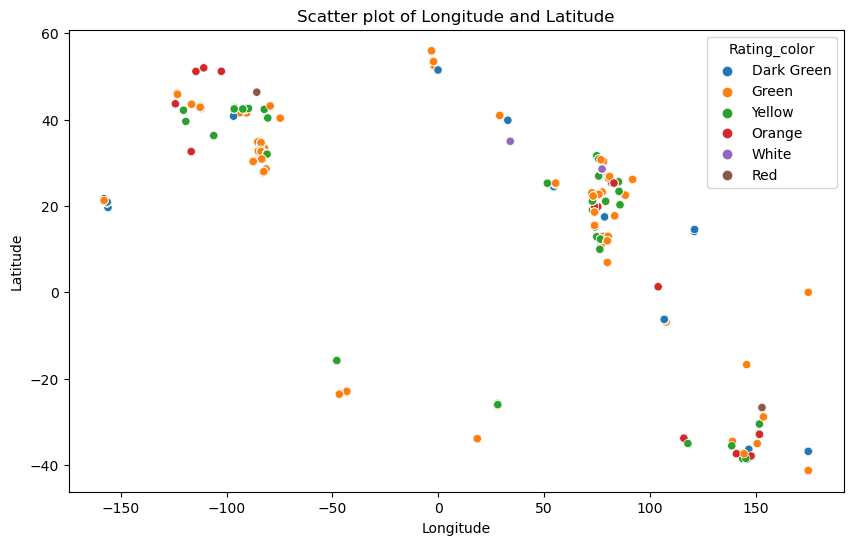

In [455]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Longitude'],y=df['Latitude'],data=df,hue=df['Rating_color'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot of Longitude and Latitude')
plt.show()


In [456]:
df['Price_range'].value_counts()

1    4139
2    2965
3    1357
4     570
Name: Price_range, dtype: int64

In [457]:
x=df.drop(['Average_Cost_for_two_USD','Average_Cost_for_two','Conversion_Rate','Address',
           'Locality','Locality_Verbose','City','Price_range','Switch_to_order_menu','Restaurant_ID',
           'Restaurant_Name','Rating_color','Cuisines','Cuisines_split','Currency'],axis=1)

In [458]:
y_pr=df['Price_range']

In [459]:
y_ac=df['Average_Cost_for_two_USD']

In [460]:
catx=[col for col in x.columns if x[col].dtypes=='O']

In [461]:
catx

['Has_Table_booking',
 'Has_Online_delivery',
 'Is_delivering_now',
 'Rating_text']

In [465]:
x[x['City_encoded'].isna()].head(60)

,Country_Code,Longitude,Latitude,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Aggregate_rating,Rating_text,Votes,City_encoded,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine


In [466]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [467]:
rating_order=[['Not rated','Poor','Average','Good','Very Good','Excellent']]

In [468]:
scale_cols=['Longitude','Latitude','Votes']

In [469]:
ohe_cols=['Has_Table_booking','Has_Online_delivery', 'Is_delivering_now',]

In [470]:
ohe=OneHotEncoder(sparse=False, categories='auto')

In [471]:
ordenc=OrdinalEncoder(categories=rating_order)

In [472]:
scaler=StandardScaler()

In [473]:
transform=ColumnTransformer(transformers=[
    ('scaler',scaler,scale_cols),
    ('OneHot',ohe,ohe_cols),
    ('Ordinal',ordenc,['Rating_text'])
],remainder='passthrough')

pipepr=imPipeline(steps=[
    ('preprocessor',transform),
    ('smote',SMOTE(random_state=42)),
    ('model_pr',RandomForestClassifier())
])

pipeac=Pipeline(steps=[
    ('preprocessor',transform),
    ('model_ac',RandomForestRegressor())
])


model_grid_pr=[
    {'model_pr': [RandomForestClassifier()]},
    {'model_pr': [GradientBoostingClassifier()]},
    {'model_pr': [RandomForestClassifier()]},
    {'model_pr': [xgb.XGBClassifier()]},
    {'model_pr': [AdaBoostClassifier()]},
    {'model_pr': [LogisticRegression()]},
    {'model_pr': [SVC()]}
    
]

model_grid_ac=[
    {'model_ac': [RandomForestRegressor()]},
    {'model_ac': [GradientBoostingRegressor()]},
    {'model_ac': [LinearRegression()]},
    {'model_ac': [Ridge()]},
    {'model_ac': [SVR()]}   
]

In [474]:
y_pr.value_counts()

1    4139
2    2965
3    1357
4     570
Name: Price_range, dtype: int64

In [475]:
xtrain_pr,xtest_pr,ytrain_pr,ytest_pr=train_test_split(x,y_pr,test_size=0.30,random_state=42)

In [476]:
xtrain_ac,xtest_ac,ytrain_ac,ytest_ac=train_test_split(x,y_ac,test_size=0.30,random_state=42)

In [477]:
gscvpr=GridSearchCV(pipepr,model_grid_pr,cv=5,scoring='accuracy',verbose=2)

In [478]:
gscvpr.fit(xtrain_pr,ytrain_pr)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ..................model_pr=RandomForestClassifier(); total time=   1.5s
[CV] END ..................model_pr=RandomForestClassifier(); total time=   1.5s
[CV] END ..................model_pr=RandomForestClassifier(); total time=   1.4s
[CV] END ..................model_pr=RandomForestClassifier(); total time=   1.4s
[CV] END ..................model_pr=RandomForestClassifier(); total time=   1.4s
[CV] END ..............model_pr=GradientBoostingClassifier(); total time=  13.7s
[CV] END ..............model_pr=GradientBoostingClassifier(); total time=  14.4s
[CV] END ..............model_pr=GradientBoostingClassifier(); total time=  15.6s
[CV] END ..............model_pr=GradientBoostingClassifier(); total time=  17.5s
[CV] END ..............model_pr=GradientBoostingClassifier(); total time=  16.1s
[CV] END ..................model_pr=RandomForestClassifier(); total time=   1.8s
[CV] END ..................model_pr=RandomForestC

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['Longitude',
                                                                          'Latitude',
                                                                          'Votes']),
                                                                        ('OneHot',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Has_Table_booking',
                                                                          'Has_Online_delivery',
                                                                          'Is_delivering_now']),
                                                                        ('Ordinal',
                                                                         OrdinalEncoder(categories=[['Not '
                                                                                                     'rated',
                                                                                                     'Poor',
                                                                                                     'Average',
                                                                                                     '...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...)]},
                         {'model_pr': [AdaBoostClassifier()]},
                         {'model_pr': [LogisticRegression()]},
                         {'model_pr': [SVC()]}],
             scoring='accuracy', verbose=2)

In [479]:
gscvpr.best_params_

{'model_pr': RandomForestClassifier()}

In [480]:
gscvpr.best_score_

0.709382598689148

In [481]:
predpr=gscvpr.predict(xtest_pr)

In [482]:
accuracy_score(ytest_pr,predpr)

0.7136531365313653

In [483]:
print(classification_report(ytest_pr,predpr))

              precision    recall  f1-score   support

           1       0.80      0.84      0.82      1186
           2       0.69      0.62      0.65       926
           3       0.57      0.64      0.60       407
           4       0.56      0.53      0.55       191

    accuracy                           0.71      2710
   macro avg       0.66      0.66      0.66      2710
weighted avg       0.71      0.71      0.71      2710



In [484]:
gscvac=GridSearchCV(pipeac,model_grid_ac,cv=5,scoring='r2',verbose=2)

In [485]:
gscvac.fit(xtrain_ac,ytrain_ac)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...................model_ac=RandomForestRegressor(); total time=   4.0s
[CV] END ...................model_ac=RandomForestRegressor(); total time=   4.1s
[CV] END ...................model_ac=RandomForestRegressor(); total time=   4.7s
[CV] END ...................model_ac=RandomForestRegressor(); total time=   4.4s
[CV] END ...................model_ac=RandomForestRegressor(); total time=   4.6s
[CV] END ...............model_ac=GradientBoostingRegressor(); total time=   2.0s
[CV] END ...............model_ac=GradientBoostingRegressor(); total time=   1.7s
[CV] END ...............model_ac=GradientBoostingRegressor(); total time=   1.8s
[CV] END ...............model_ac=GradientBoostingRegressor(); total time=   1.8s
[CV] END ...............model_ac=GradientBoostingRegressor(); total time=   2.4s
[CV] END ........................model_ac=LinearRegression(); total time=   0.1s
[CV] END ........................model_ac=LinearR

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['Longitude',
                                                                          'Latitude',
                                                                          'Votes']),
                                                                        ('OneHot',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Has_Table_booking',
                                                                          'Has_Online_delivery',
                                                                          'Is_delivering_now']),
                                                                        ('Ordinal',
                                                                         OrdinalEncoder(categories=[['Not '
                                                                                                     'rated',
                                                                                                     'Poor',
                                                                                                     'Average',
                                                                                                     'Good',
                                                                                                     'Very '
                                                                                                     'Good',
                                                                                                     'Excellent']]),
                                                                         ['Rating_text'])])),
                                       ('model_ac', RandomForestRegressor())]),
             param_grid=[{'model_ac': [RandomForestRegressor()]},
                         {'model_ac': [GradientBoostingRegressor()]},
                         {'model_ac': [LinearRegression()]},
                         {'model_ac': [Ridge()]}, {'model_ac': [SVR()]}],
             scoring='r2', verbose=2)

In [486]:
gscvac.best_params_

{'model_ac': RandomForestRegressor()}

In [487]:
gscvac.best_score_

0.6423460757400503

In [488]:
predac=gscvac.predict(xtest_ac)

In [489]:
r2_score(ytest_ac,predac)

0.661066391675629

In [490]:
df.columns.values

array(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City',
       'Address', 'Locality', 'Locality_Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average_Cost_for_two', 'Currency',
       'Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now',
       'Switch_to_order_menu', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Conversion_Rate',
       'Average_Cost_for_two_USD', 'City_encoded', 'No_of_cuisines',
       'Cuisines_split', 'Afghani', 'African', 'American', 'Andhra',
       'Arabian', 'Argentine', 'Armenian', 'Asian', 'Asian Fusion',
       'Assamese', 'Australian', 'Awadhi', 'BBQ', 'Bakery', 'Bar Food',
       'Belgian', 'Bengali', 'Beverages', 'Bihari', 'Biryani',
       'Brazilian', 'Breakfast', 'British', 'Bubble Tea', 'Burger',
       'Burmese', 'Bí_rek', 'Cafe', 'Cajun', 'Canadian', 'Cantonese',
       'Caribbean', 'Charcoal Grill', 'Chettinad', 'Chinese',
       'Coffee and Tea', 'Contemporary', 'Continental', 'C

In [491]:
drop_cols=df.iloc[:,26:171]

In [492]:
xnew=df.drop(drop_cols,axis=1)

In [493]:
xnew.head(2)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Conversion_Rate,Average_Cost_for_two_USD,City_encoded,No_of_cuisines,Cuisines_split
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,3,4.8,Dark Green,Excellent,314,0.075374,82.9114,86.6801,3,"[French, Japanese, Desserts]"
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,3,4.5,Dark Green,Excellent,591,0.075374,90.4488,86.6801,1,[Japanese]


In [494]:
xnew=xnew.drop(['Average_Cost_for_two_USD','Average_Cost_for_two','Conversion_Rate','Address',
           'Locality','Locality_Verbose','City','Price_range','Switch_to_order_menu','Restaurant_ID',
           'Restaurant_Name','Rating_color','Cuisines','Cuisines_split','Currency'],axis=1)

In [495]:
xnew

,Country_Code,Longitude,Latitude,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Aggregate_rating,Rating_text,Votes,City_encoded,No_of_cuisines
0,162,121.027535,14.565443,Yes,No,No,4.8,Excellent,314,86.680100,3
1,162,121.014101,14.553708,Yes,No,No,4.5,Excellent,591,86.680100,1
2,162,121.056831,14.581404,Yes,No,No,4.4,Very Good,270,150.748000,4
3,162,121.056475,14.585318,No,No,No,4.9,Excellent,365,150.748000,2
4,162,121.057508,14.584450,Yes,No,No,4.8,Excellent,229,150.748000,2
...,...,...,...,...,...,...,...,...,...,...,...
9546,208,28.977392,41.022793,No,No,No,4.1,Very Good,788,2.391394,1
9547,208,29.041297,41.009847,No,No,No,4.2,Very Good,1034,2.391394,3
9548,208,29.034640,41.055817,No,No,No,3.7,Good,661,2.391394,2
9549,208,29.036019,41.057979,No,No,No,4.0,Very Good,901,2.391394,1


In [496]:
xnew_trainpr,xnew_testpr,ynew_trainpr,ynew_testpr=train_test_split(xnew,y_pr,test_size=0.30,random_state=42)

In [497]:
gsnew=GridSearchCV(pipepr,model_grid_pr,cv=5,scoring='accuracy',verbose=2)

In [498]:
gsnew.fit(xnew_trainpr,ynew_trainpr)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ..................model_pr=RandomForestClassifier(); total time=   1.3s
[CV] END ..................model_pr=RandomForestClassifier(); total time=   1.3s
[CV] END ..................model_pr=RandomForestClassifier(); total time=   1.3s
[CV] END ..................model_pr=RandomForestClassifier(); total time=   1.3s
[CV] END ..................model_pr=RandomForestClassifier(); total time=   1.3s
[CV] END ..............model_pr=GradientBoostingClassifier(); total time=   6.2s
[CV] END ..............model_pr=GradientBoostingClassifier(); total time=   6.5s
[CV] END ..............model_pr=GradientBoostingClassifier(); total time=   6.6s
[CV] END ..............model_pr=GradientBoostingClassifier(); total time=   6.5s
[CV] END ..............model_pr=GradientBoostingClassifier(); total time=   6.6s
[CV] END ..................model_pr=RandomForestClassifier(); total time=   1.4s
[CV] END ..................model_pr=RandomForestC

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['Longitude',
                                                                          'Latitude',
                                                                          'Votes']),
                                                                        ('OneHot',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Has_Table_booking',
                                                                          'Has_Online_delivery',
                                                                          'Is_delivering_now']),
                                                                        ('Ordinal',
                                                                         OrdinalEncoder(categories=[['Not '
                                                                                                     'rated',
                                                                                                     'Poor',
                                                                                                     'Average',
                                                                                                     '...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...)]},
                         {'model_pr': [AdaBoostClassifier()]},
                         {'model_pr': [LogisticRegression()]},
                         {'model_pr': [SVC()]}],
             scoring='accuracy', verbose=2)

In [499]:
gsnew.best_params_

{'model_pr': GradientBoostingClassifier()}

In [500]:
gsnew.best_score_

0.6343937309251013

In [501]:
prednew_pr=gsnew.predict(xnew_testpr)

In [502]:
accuracy_score(ynew_testpr,prednew_pr)

0.6420664206642066

In [503]:
xnew_trainac,xnew_testac,ynew_trainac,ynew_testac=train_test_split(xnew,y_ac,test_size=0.30,random_state=42)

In [504]:
gsnew_ac=GridSearchCV(pipeac,model_grid_ac,cv=5,scoring='r2',verbose=2)

In [505]:
gsnew_ac.fit(xnew_trainac,ynew_trainac)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...................model_ac=RandomForestRegressor(); total time=   2.0s
[CV] END ...................model_ac=RandomForestRegressor(); total time=   1.9s
[CV] END ...................model_ac=RandomForestRegressor(); total time=   2.0s
[CV] END ...................model_ac=RandomForestRegressor(); total time=   2.2s
[CV] END ...................model_ac=RandomForestRegressor(); total time=   2.0s
[CV] END ...............model_ac=GradientBoostingRegressor(); total time=   0.6s
[CV] END ...............model_ac=GradientBoostingRegressor(); total time=   0.7s
[CV] END ...............model_ac=GradientBoostingRegressor(); total time=   0.6s
[CV] END ...............model_ac=GradientBoostingRegressor(); total time=   0.6s
[CV] END ...............model_ac=GradientBoostingRegressor(); total time=   0.6s
[CV] END ........................model_ac=LinearRegression(); total time=   0.0s
[CV] END ........................model_ac=LinearR

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['Longitude',
                                                                          'Latitude',
                                                                          'Votes']),
                                                                        ('OneHot',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Has_Table_booking',
                                                                          'Has_Online_delivery',
                                                                          'Is_delivering_now']),
                                                                        ('Ordinal',
                                                                         OrdinalEncoder(categories=[['Not '
                                                                                                     'rated',
                                                                                                     'Poor',
                                                                                                     'Average',
                                                                                                     'Good',
                                                                                                     'Very '
                                                                                                     'Good',
                                                                                                     'Excellent']]),
                                                                         ['Rating_text'])])),
                                       ('model_ac', RandomForestRegressor())]),
             param_grid=[{'model_ac': [RandomForestRegressor()]},
                         {'model_ac': [GradientBoostingRegressor()]},
                         {'model_ac': [LinearRegression()]},
                         {'model_ac': [Ridge()]}, {'model_ac': [SVR()]}],
             scoring='r2', verbose=2)

In [506]:
gsnew_ac.best_params_

{'model_ac': Ridge()}

In [507]:
gsnew_ac.best_score_

0.5572395304940538

In [508]:
newpred_ac=gsnew_ac.predict(xnew_testac)

In [509]:
r2_score(ynew_testac,newpred_ac)

0.6127987369222134

#### Hence we can observe that gscvpr is yeilding the best results for Price Range Prediction with 71.36%, Whereas gscvac is giving best score of 66% for predicting Average_Cost_for_two, Hence we will be selecting these as final models.


In [510]:
final_model_pr=gscvpr.best_estimator_

In [511]:
final_model_ac=gscvac.best_estimator_